In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
sns.set()
py.init_notebook_mode(connected = True)

In [ ]:
ds = pd.read_csv('log-CTI.csv')
ds

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-CB,175.140.89.227,49927,AS4788,204.95.99.31,1921,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,SinkHoleMessage,1.310000e+17,B106-Jenxcus,60.54.85.214,24026,AS4788,204.95.99.86,991,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,202.162.25.177,58104,AS18206,204.95.99.109,7777,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
3,SinkHoleMessage,1.310000e+17,B106-MULTI,120.141.81.6,53052,AS38322,204.95.99.109,88,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,SinkHoleMessage,1.310000e+17,B106-Bladabindi,210.195.121.234,61840,AS4788,204.95.99.26,1333,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,SinkHoleMessage,1.310000e+17,B106-CB,175.142.24.151,54750,AS4788,204.95.99.31,288,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1746,SinkHoleMessage,1.310000e+17,B106-CB,120.139.159.183,62649,AS38322,204.95.99.31,1920,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1747,SinkHoleMessage,1.310000e+17,B106-MULTI,175.140.89.166,59143,AS4788,204.95.99.109,7777,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1748,SinkHoleMessage,1.310000e+17,B106-CB,14.1.198.95,52497,AS45960,204.95.99.31,81,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [ ]:
print(ds.shape)
missing_values_count = ds.isnull().sum()
missing_values_count

(1750, 29)


SourcedFrom               0
FileTimeUtc               0
Botnet                    0
SourceIp                  0
SourcePort                0
SourceIpAsnNr             0
TargetIp                  0
TargetPort                0
Payload                1750
SourceIpCountryCode       0
SourceIpRegion          102
SourceIpCity            102
SourceIpPostalCode     1749
SourceIpLatitude          0
SourceIpLongitude         0
SourceIpMetroCode         0
SourceIpAreaCode          0
HttpRequest              10
HttpReferrer           1739
HttpUserAgent          1748
HttpMethod             1749
HttpVersion            1749
HttpHost               1749
Custom Field 1         1750
Custom Field 2         1750
Custom Field 3         1750
Custom Field 4         1750
Custom Field 5         1750
Threat Confidence         0
dtype: int64

In [ ]:
ds["Threat Confidence"].value_counts()

High    1661
Low       89
Name: Threat Confidence, dtype: int64

In [ ]:
 ds = ds.drop(['Payload','SourceIpPostalCode','HttpReferrer','HttpUserAgent','HttpUserAgent',
         'HttpMethod','HttpVersion','HttpHost','Custom Field 1','Custom Field 2',
         'Custom Field 3','Custom Field 4','Custom Field 5','SourceIpCountryCode'],axis=1)
ds

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpRegion,SourceIpCity,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,HttpRequest,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-CB,175.140.89.227,49927,AS4788,204.95.99.31,1921,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /is-ready HTTP/1.1,High
1,SinkHoleMessage,1.310000e+17,B106-Jenxcus,60.54.85.214,24026,AS4788,204.95.99.86,991,NaN,NaN,2.5000,112.5000,0,0,POST /is-ready HTTP/1.1,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,202.162.25.177,58104,AS18206,204.95.99.109,7777,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /ready HTTP/1.1,High
3,SinkHoleMessage,1.310000e+17,B106-MULTI,120.141.81.6,53052,AS38322,204.95.99.109,88,12.0,Batu Caves,3.2333,101.6667,0,0,POST /is-ready HTTP/1.1,High
4,SinkHoleMessage,1.310000e+17,B106-Bladabindi,210.195.121.234,61840,AS4788,204.95.99.26,1333,12.0,Petaling Jaya,3.0833,101.6500,0,0,POST /is-ready HTTP/1.1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,SinkHoleMessage,1.310000e+17,B106-CB,175.142.24.151,54750,AS4788,204.95.99.31,288,16.0,Kota Kinabalu,5.9749,116.0724,0,0,POST /is-ready HTTP/1.1,High
1746,SinkHoleMessage,1.310000e+17,B106-CB,120.139.159.183,62649,AS38322,204.95.99.31,1920,12.0,Petaling Jaya,3.0833,101.6500,0,0,POST /is-ready HTTP/1.1,High
1747,SinkHoleMessage,1.310000e+17,B106-MULTI,175.140.89.166,59143,AS4788,204.95.99.109,7777,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /ready HTTP/1.1,High
1748,SinkHoleMessage,1.310000e+17,B106-CB,14.1.198.95,52497,AS45960,204.95.99.31,81,6.0,Kuantan,3.8077,103.3260,0,0,POST /is-ready HTTP/1.1,High


In [ ]:
# legit post request = POST /is-ready HTTP/1.0
# not legit = 33|

reqst = []
for j in range(ds.shape[0]):
    try:
        if ds.HttpRequest.iloc[j].lower().find('post') >= 0:
            reqst.append('LEGIT')
        else:
            reqst.append('NOT')
    except:
        reqst.append('NOT')

ds['PostLegit'] = reqst
ds.PostLegit.head()

0    LEGIT
1    LEGIT
2    LEGIT
3    LEGIT
4    LEGIT
Name: PostLegit, dtype: object

In [ ]:
ds.PostLegit

0       LEGIT
1       LEGIT
2       LEGIT
3       LEGIT
4       LEGIT
        ...  
1745    LEGIT
1746    LEGIT
1747    LEGIT
1748    LEGIT
1749      NOT
Name: PostLegit, Length: 1750, dtype: object

IndexError: ignored

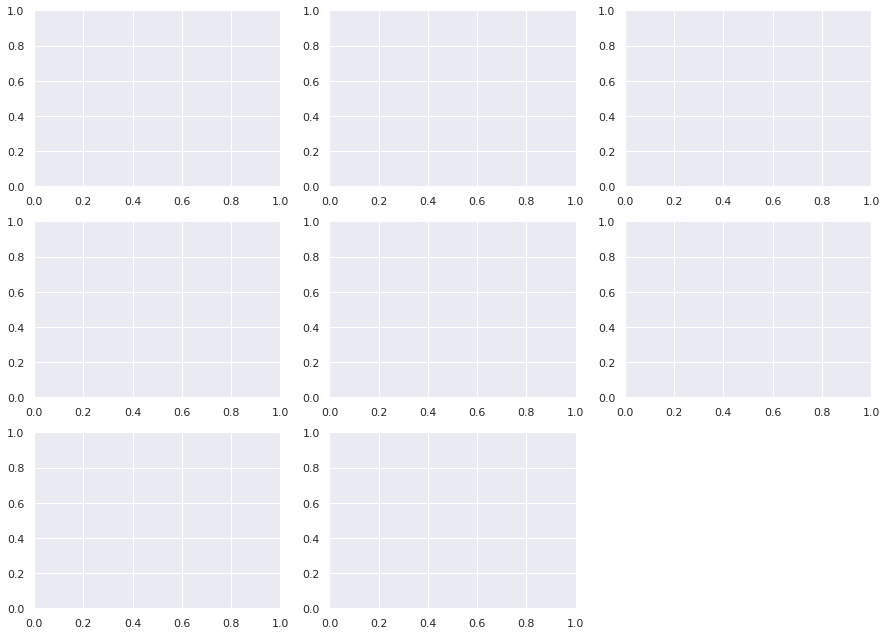

In [ ]:
ds.hist(bins = 50,figsize = (15,11))

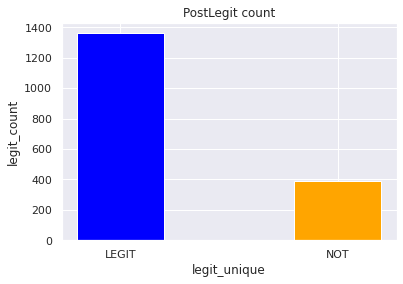

In [ ]:
legit_unique, legit_count = np.unique(ds['PostLegit'], return_counts = True)
plt.bar(legit_unique, legit_count, color =['blue','orange'],
        width = 0.4)
plt.xlabel("legit_unique")
plt.ylabel("legit_count")
plt.title("PostLegit count")
plt.show()

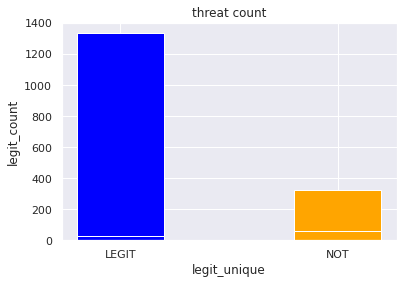

In [ ]:
threat = ds['Threat Confidence'].unique().tolist()
data_bar = []
for j in threat:
    legit_unique, legit_count = np.unique(ds[ds['Threat Confidence']==j]['PostLegit'], return_counts = True)
    plt.bar(legit_unique, legit_count, color =['blue','orange'],
        width = 0.4)
    plt.xlabel('legit_unique')
    plt.ylabel("legit_count")
    plt.title("threat count")
plt.show()

In [ ]:
arrays = []
for j in threat:
    arrays.append(np.unique(ds[ds['Threat Confidence']==j]['PostLegit'], return_counts = True)[1])
arrays = np.array(arrays)
total_high = np.sum(arrays[0,:])
total_low = np.sum(arrays[1,:])

print('ratio high threat for legit:not, %f:%f'%(arrays[0,0]/total_high,arrays[0,1]/total_high))
print('ratio low threat for legit:not, %f:%f'%(arrays[1,0]/total_low,arrays[1,1]/total_low))

ratio high threat for legit:not, 0.803733:0.196267
ratio low threat for legit:not, 0.292135:0.707865


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



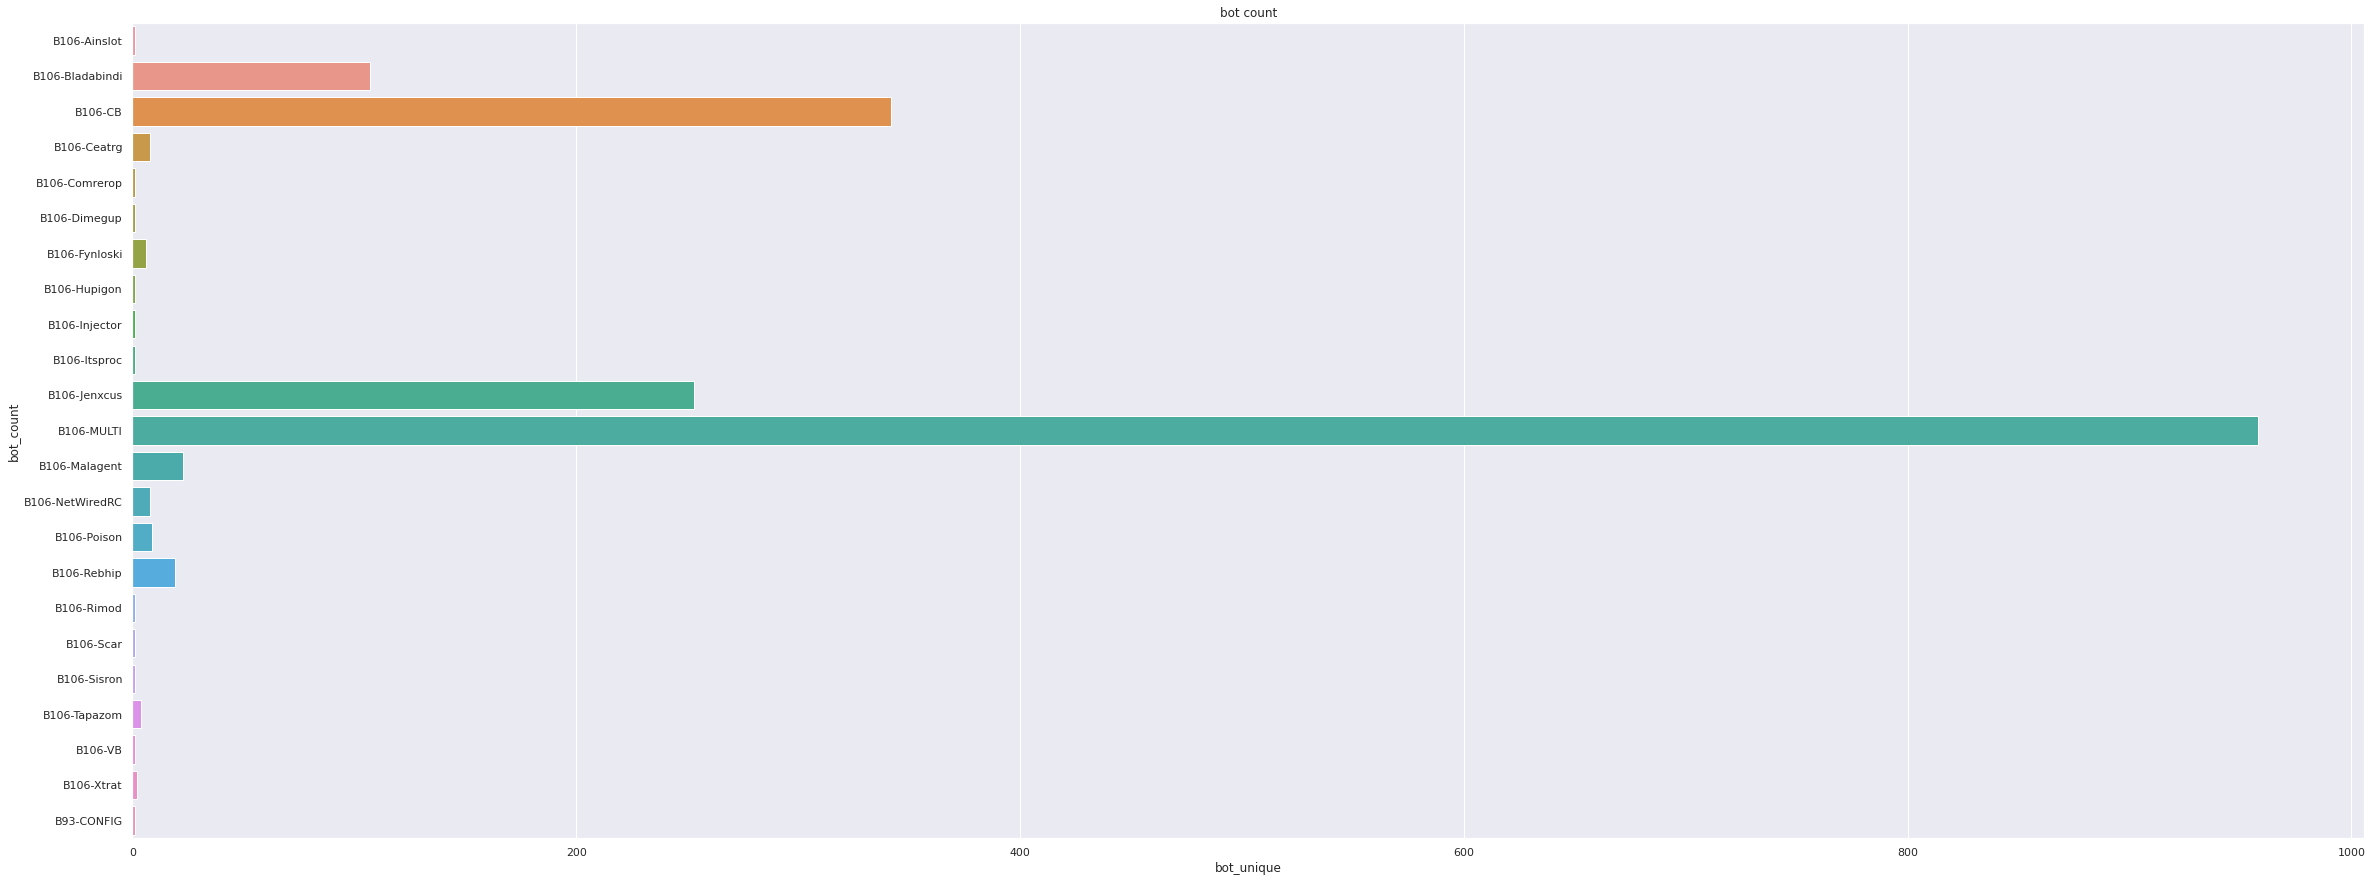

In [ ]:
bot_unique, bot_count = np.unique(ds['Botnet'], return_counts = True)
fig = plt.figure(figsize =(40, 15))
sns.barplot(bot_count, bot_unique)

plt.xlabel("bot_unique")
plt.ylabel("bot_count")
plt.title("bot count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



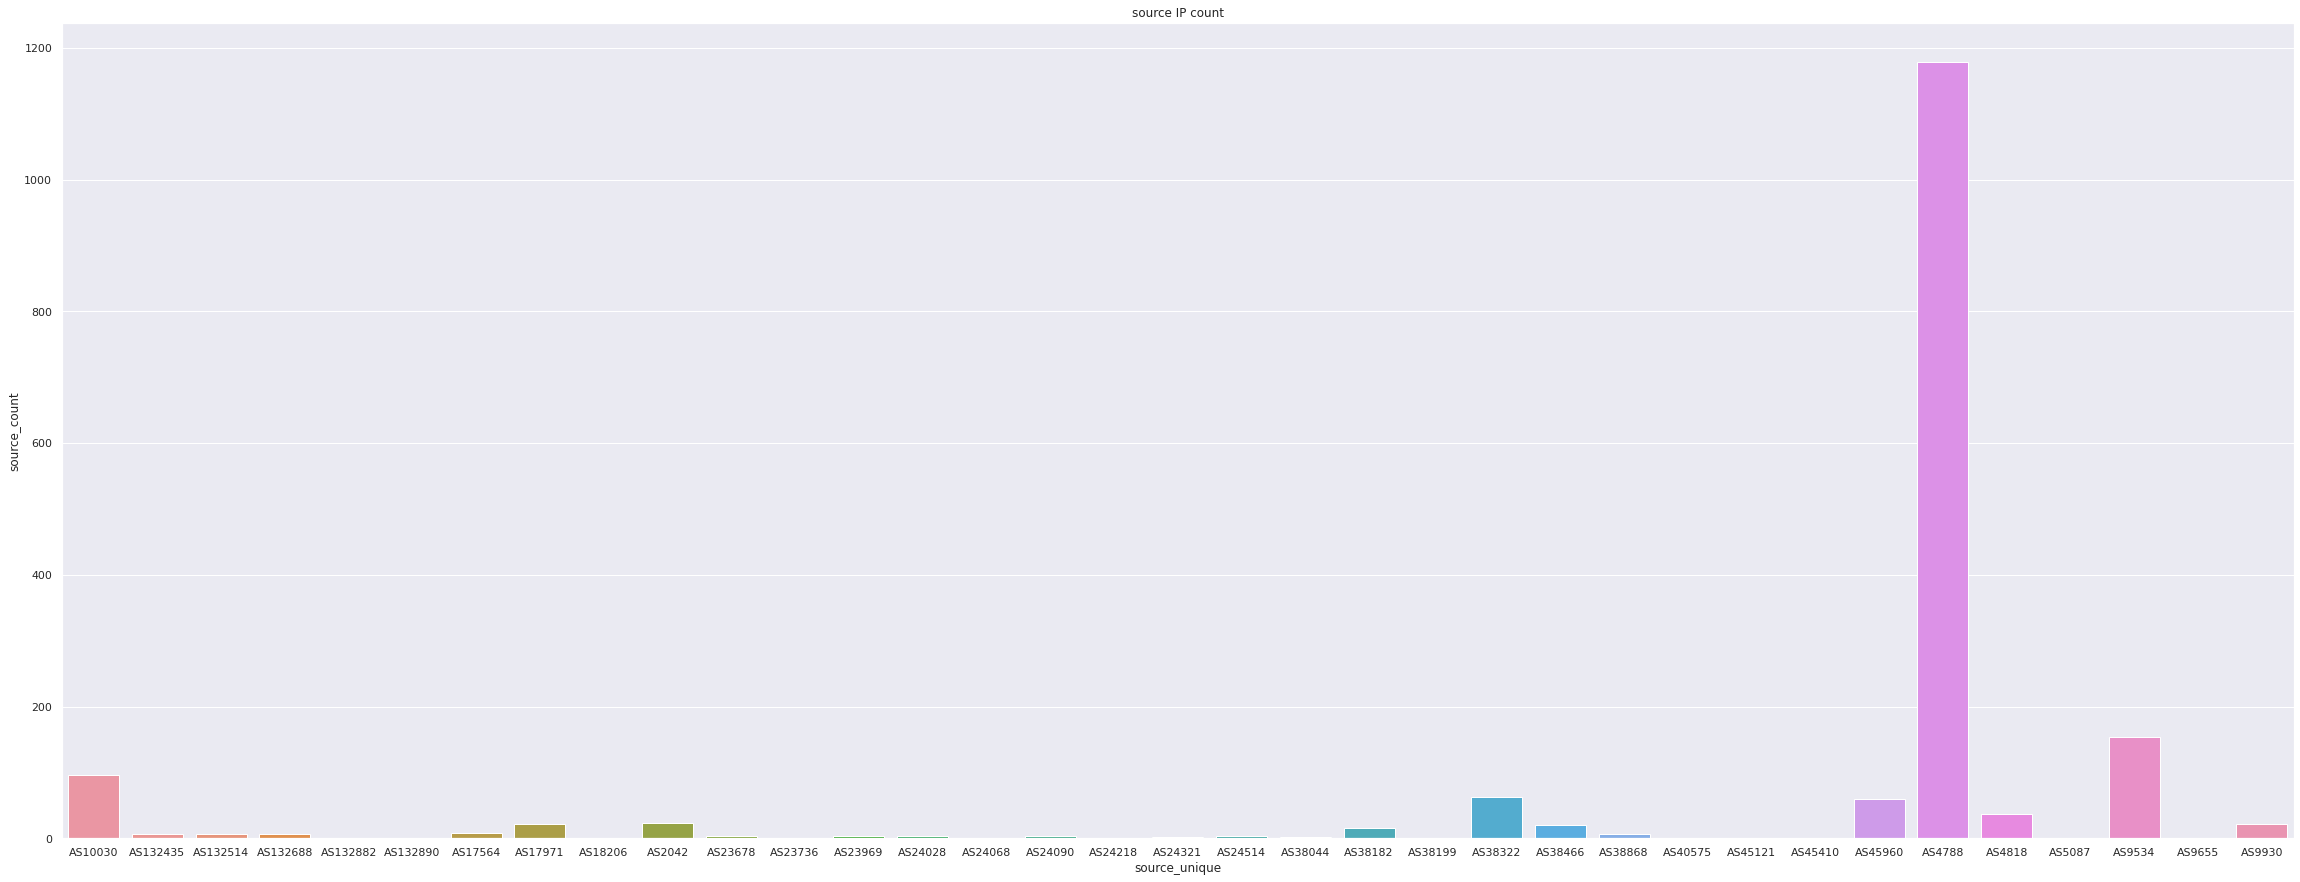

In [ ]:
source_unique, source_count = np.unique(ds['SourceIpAsnNr'], return_counts = True)
fig = plt.figure(figsize =(40, 15))
sns.barplot(source_unique,source_count)
plt.xlabel("source_unique")
plt.ylabel("source_count")
plt.title("source IP count")
plt.show()

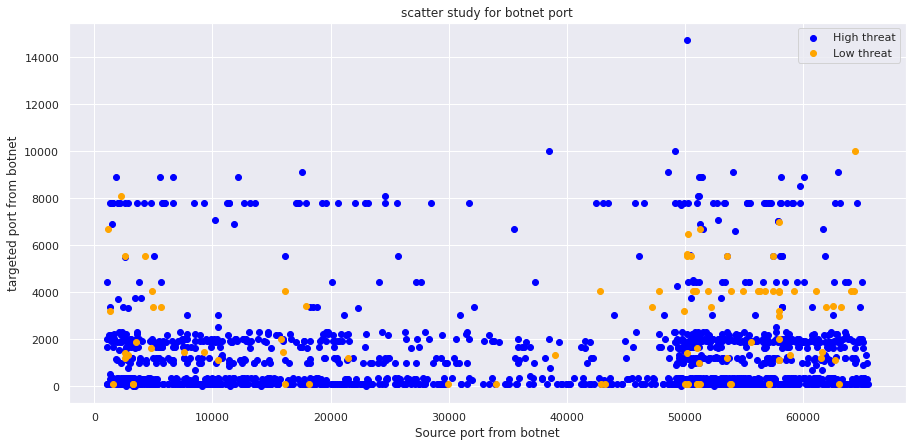

In [ ]:
plt.figure(figsize=(15,7))
colors = ['blue','orange']
for no, j in enumerate(threat):
    plt.scatter(ds[ds['Threat Confidence']==j]['SourcePort'],ds[ds['Threat Confidence']==j]['TargetPort'],
                label=j+' threat',color=colors[no])
plt.xlabel('Source port from botnet')
plt.ylabel('targeted port from botnet')
plt.title('scatter study for botnet port')
plt.legend()
plt.show()

In [ ]:
queries = ds[ds['Threat Confidence']=='High']['TargetPort'].values
targetport_below_2k = np.where(queries <= 2000)[0]
print('ratio HIGH threat TARGETED port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio HIGH threat TARGETED port for botnet <= 2k: > 2k, 0.841060:0.158940


In [ ]:
queries = ds[ds['Threat Confidence']=='Low']['TargetPort'].values
targetport_below_2k = np.where(queries <= 2000)[0]
print('ratio LOW threat TARGETED port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio LOW threat TARGETED port for botnet <= 2k: > 2k, 0.494382:0.505618


In [ ]:
queries = ds[ds['Threat Confidence']=='High']['SourcePort'].values
targetport_below_2k = np.where(queries <= ds['SourcePort'].max()/2)[0]
print('ratio HIGH threat SOURCE port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio HIGH threat SOURCE port for botnet <= 2k: > 2k, 0.443709:0.556291


In [ ]:
queries = ds[ds['Threat Confidence']=='Low']['SourcePort'].values
targetport_below_2k = np.where(queries <= ds['SourcePort'].max()/2)[0]
print('ratio LOW threat SOURCE port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio LOW threat SOURCE port for botnet <= 2k: > 2k, 0.314607:0.685393


AS4788 is TM.NET

AS9534 is Binariang Berhad

AS10030 is Celcom internet Provider

AS38322 is WEBE

AS45960 is YTL Communication

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



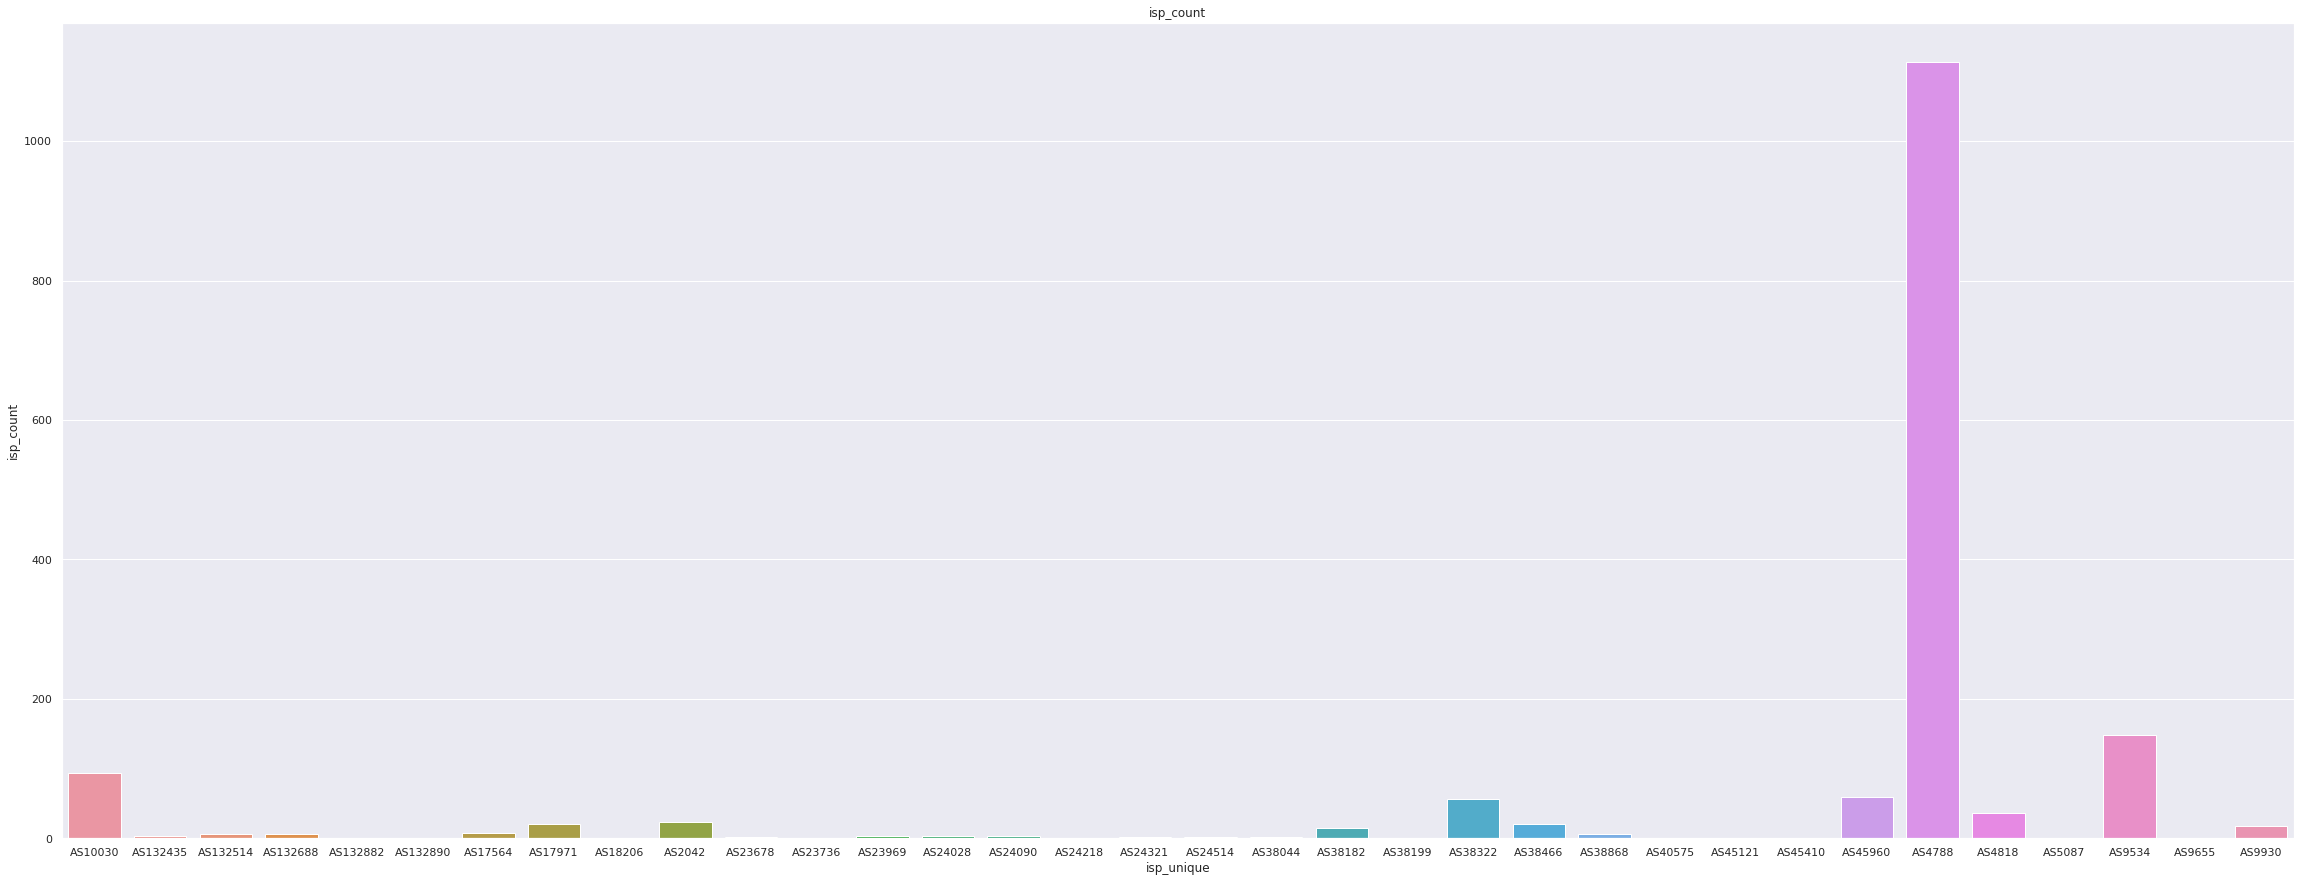

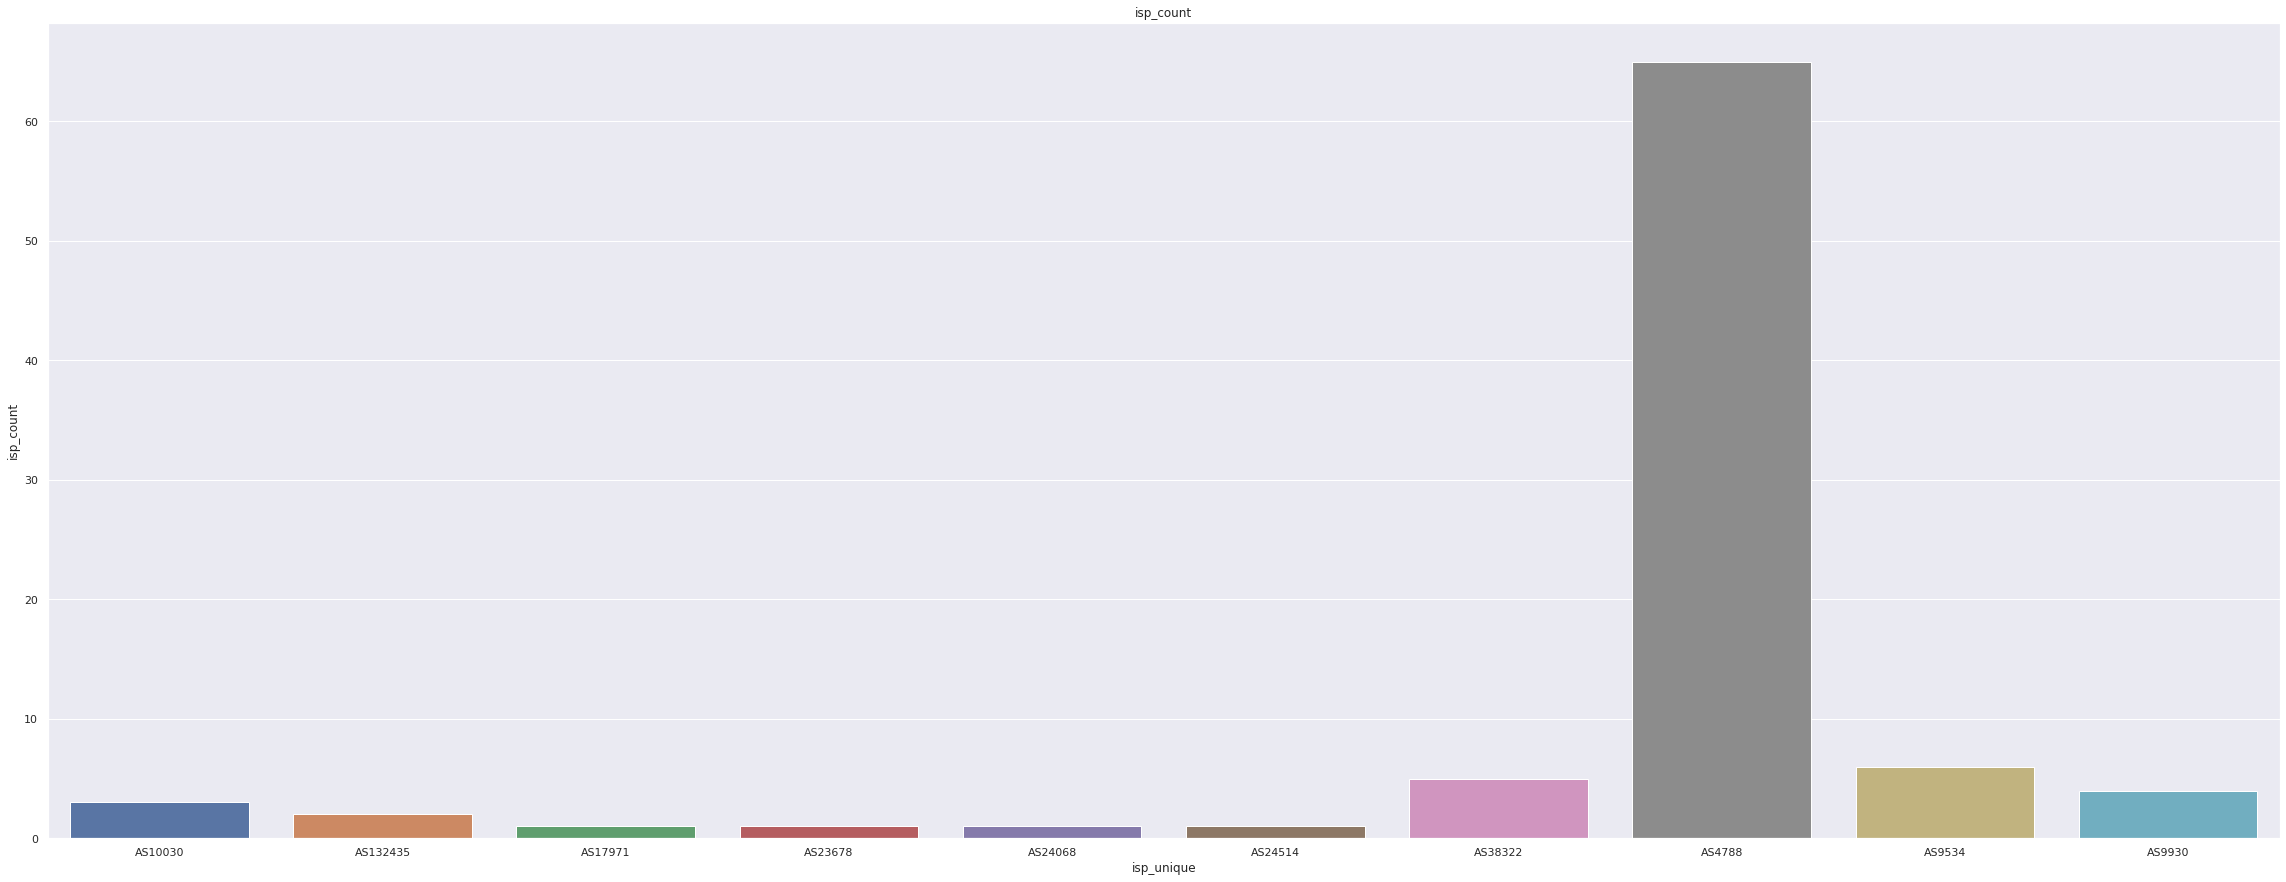

In [ ]:
threat = ds['Threat Confidence'].unique().tolist()
for j in threat:
    isp_unique, isp_count = np.unique(ds[ds['Threat Confidence']==j]['SourceIpAsnNr'], return_counts = True)
    fig = plt.figure(figsize =(40, 15))
    sns.barplot(isp_unique,isp_count)
    plt.xlabel('isp_unique')
    plt.ylabel('isp_count')
    plt.title('isp_count')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



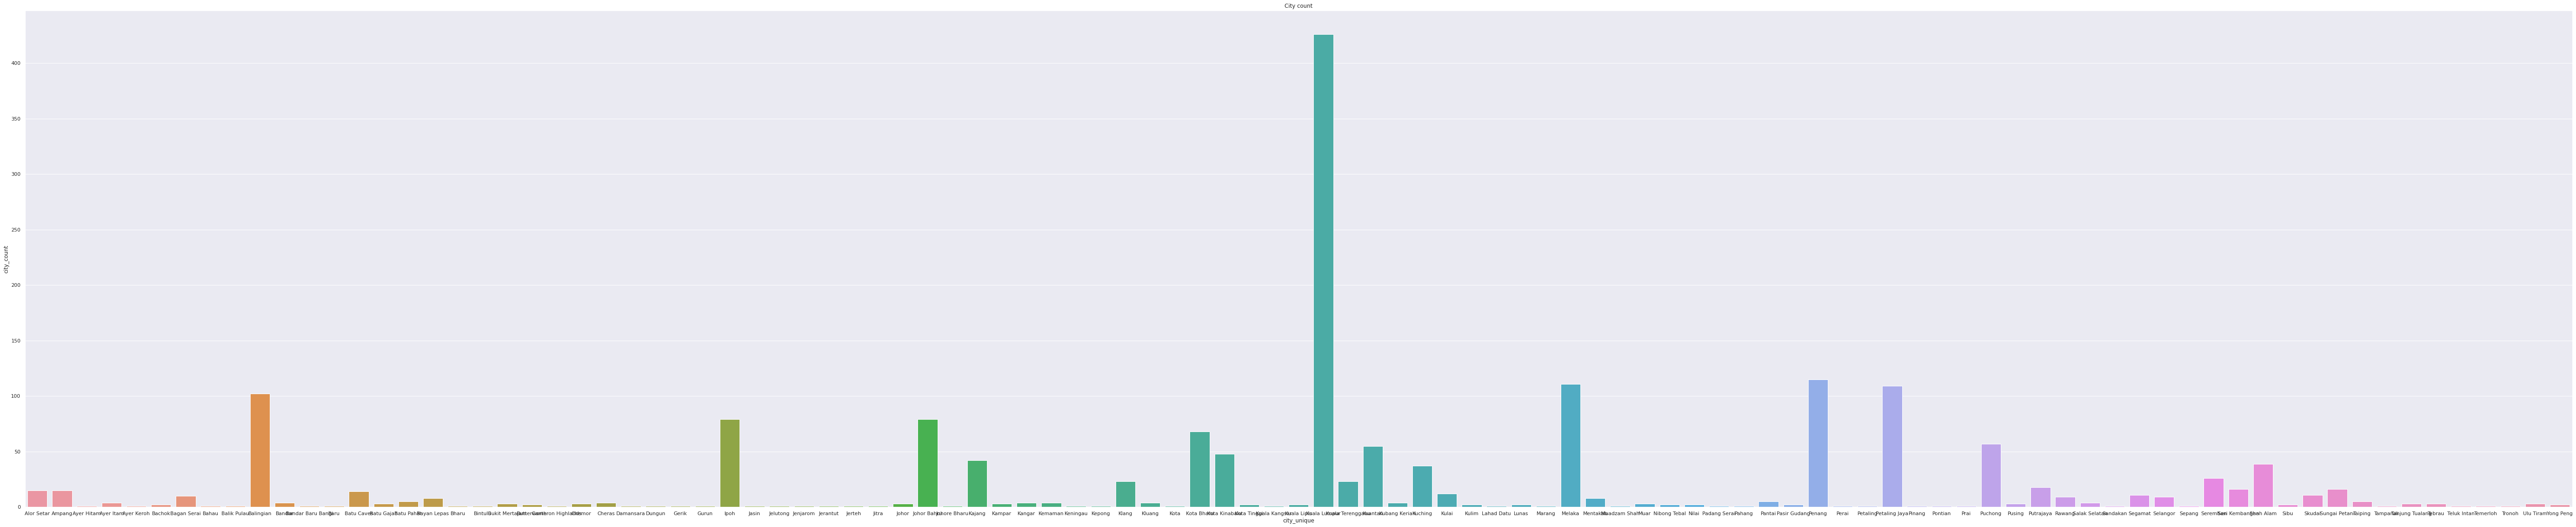

In [ ]:
ds['SourceIpCity']=ds['SourceIpCity'].fillna('Balingian')
city_unique, city_count = np.unique(ds['SourceIpCity'], return_counts = True)
fig = plt.figure(figsize =(100, 20))
sns.barplot(city_unique,city_count)
plt.xlabel('city_unique')
plt.ylabel('city_count')
plt.title("City count")
plt.show()

In [ ]:
first_source, first_num = [], []
for j in range(ds.shape[0]):
    first_source.append(ds['SourceIp'].iloc[j].split('.')[0]+'.X.X.X')
    first_num.append(int(ds['SourceIp'].iloc[j].split('.')[0]))
ds['FirstSource'] = first_source
ds['FirstNum'] = first_num
ds['FirstSource'].head()

0    175.X.X.X
1     60.X.X.X
2    202.X.X.X
3    120.X.X.X
4    210.X.X.X
Name: FirstSource, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



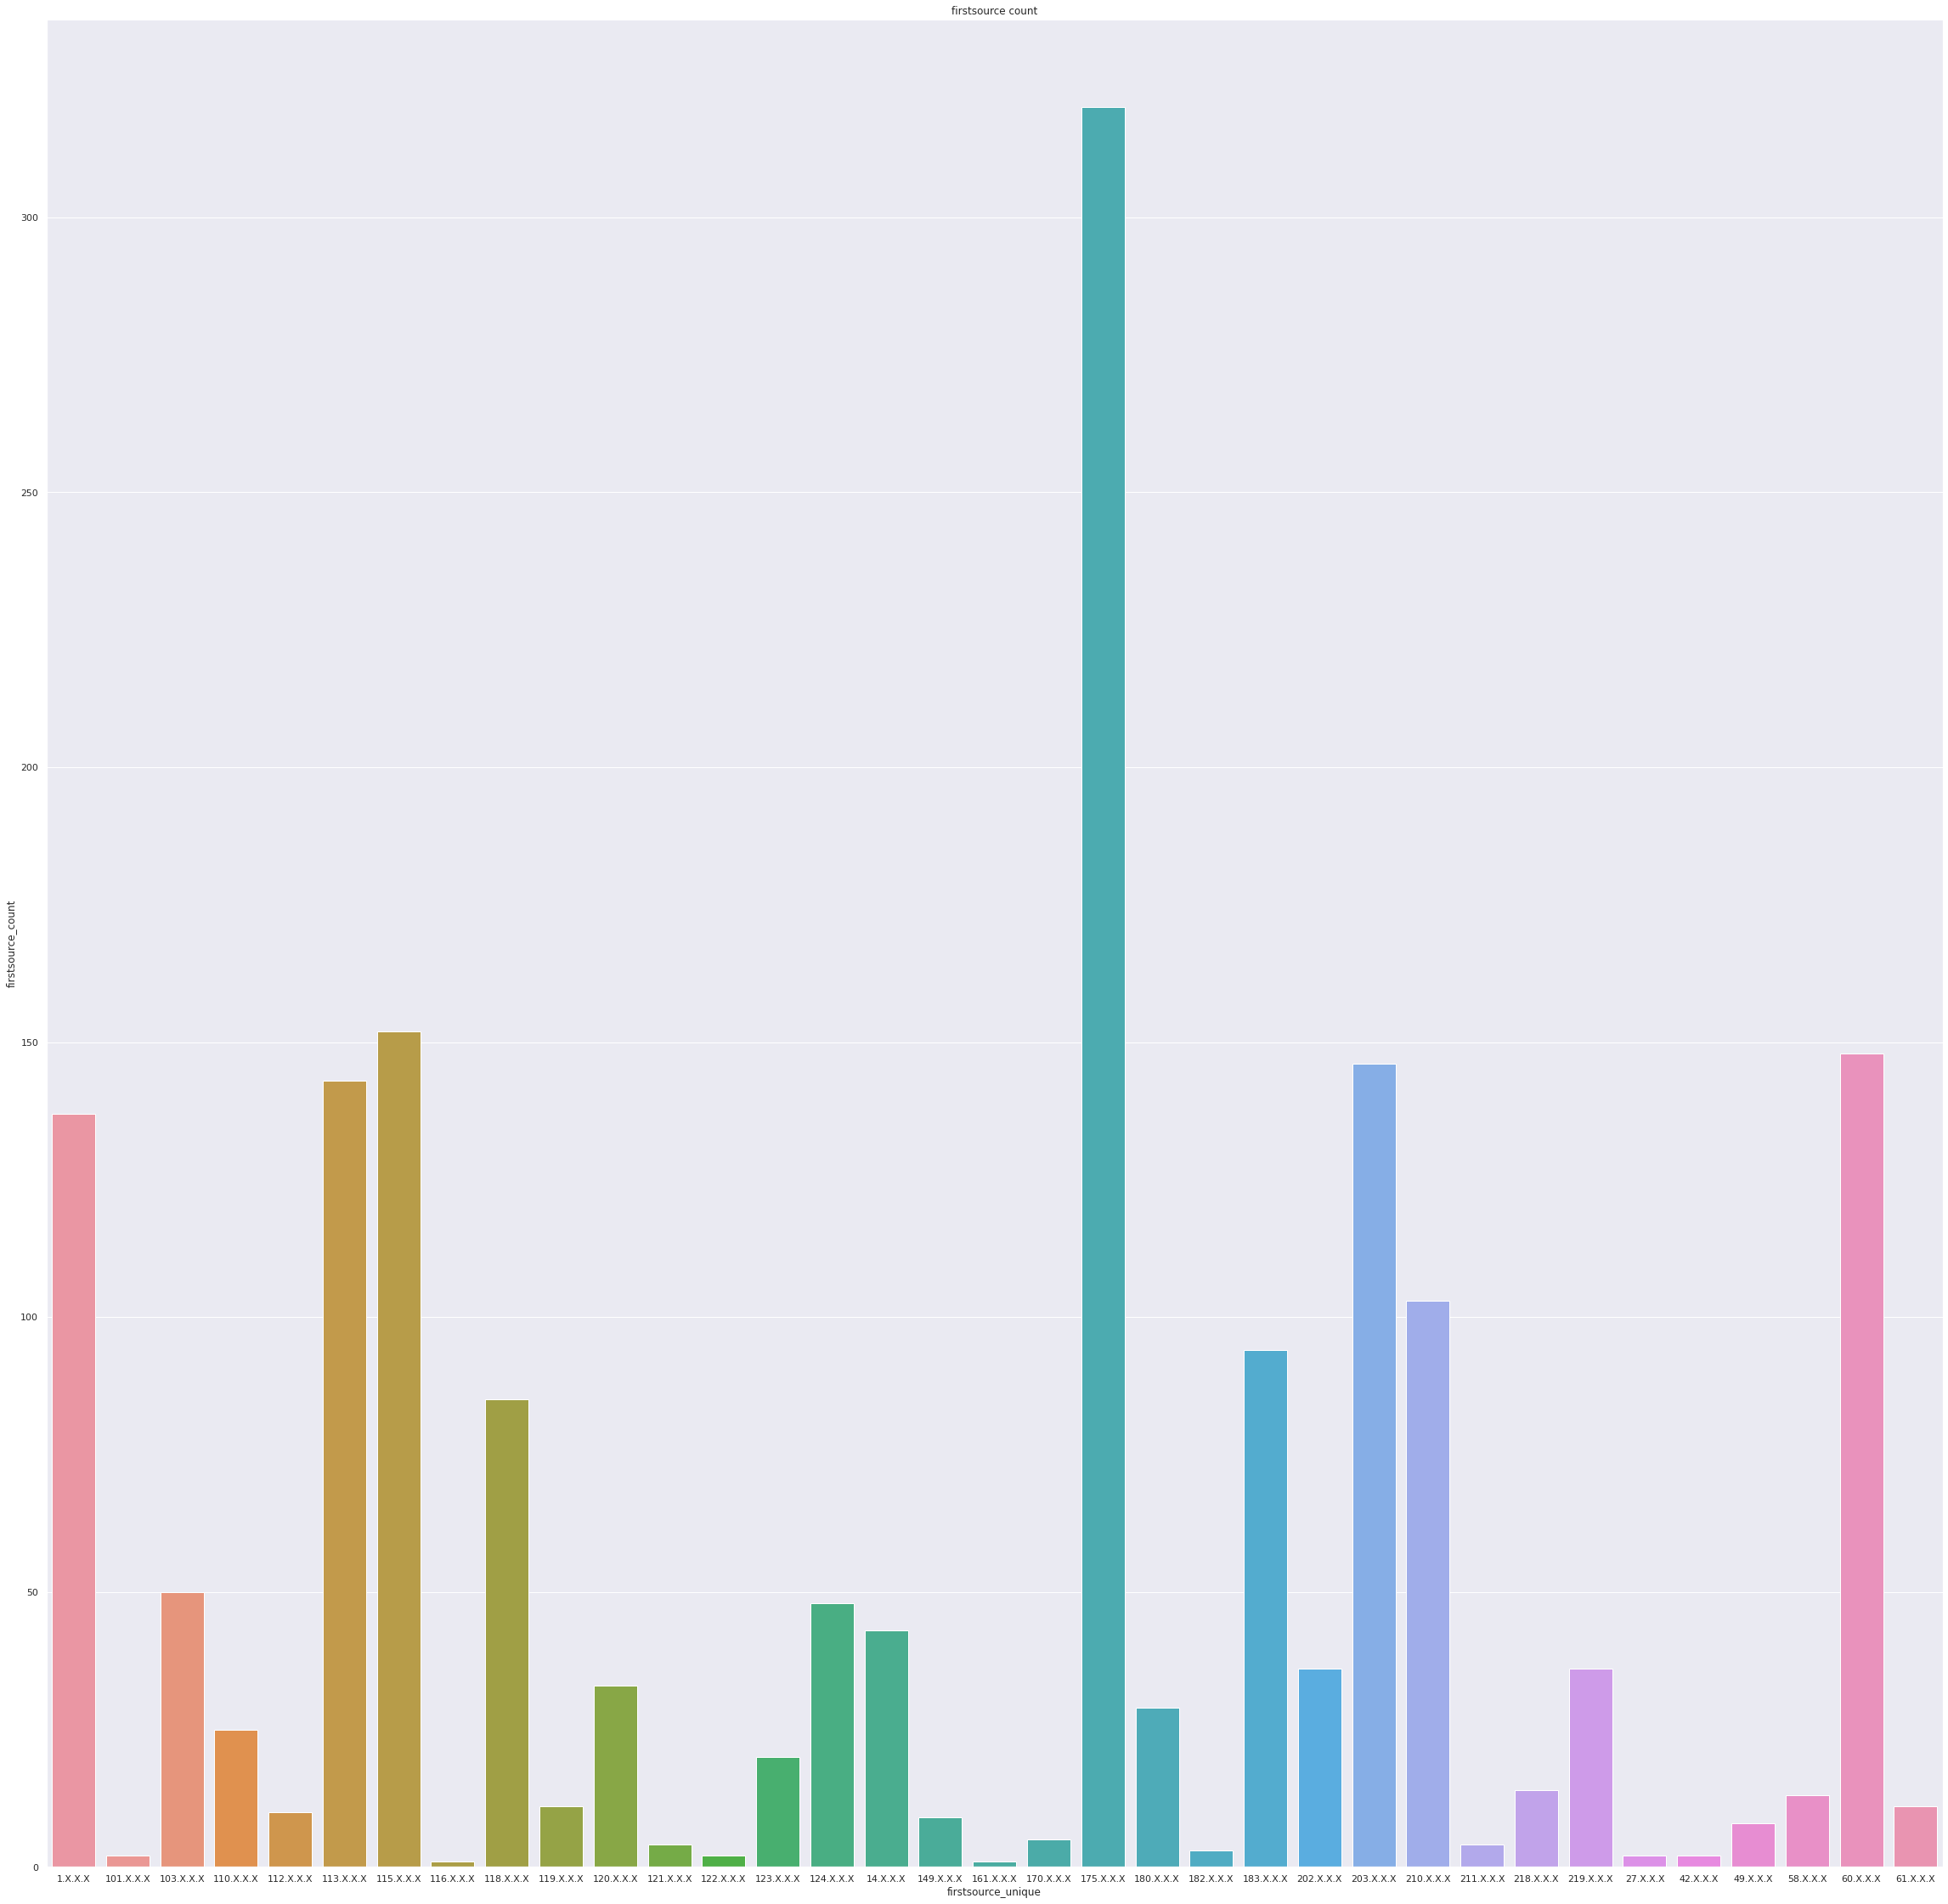

In [ ]:
firstsource_unique, firstsource_count = np.unique(ds['FirstSource'], return_counts = True)
fig = plt.figure(figsize =(40,40))
sns.barplot(firstsource_unique,firstsource_count)
plt.xlabel('firstsource_unique')
plt.ylabel('firstsource_count')
plt.title('firstsource count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



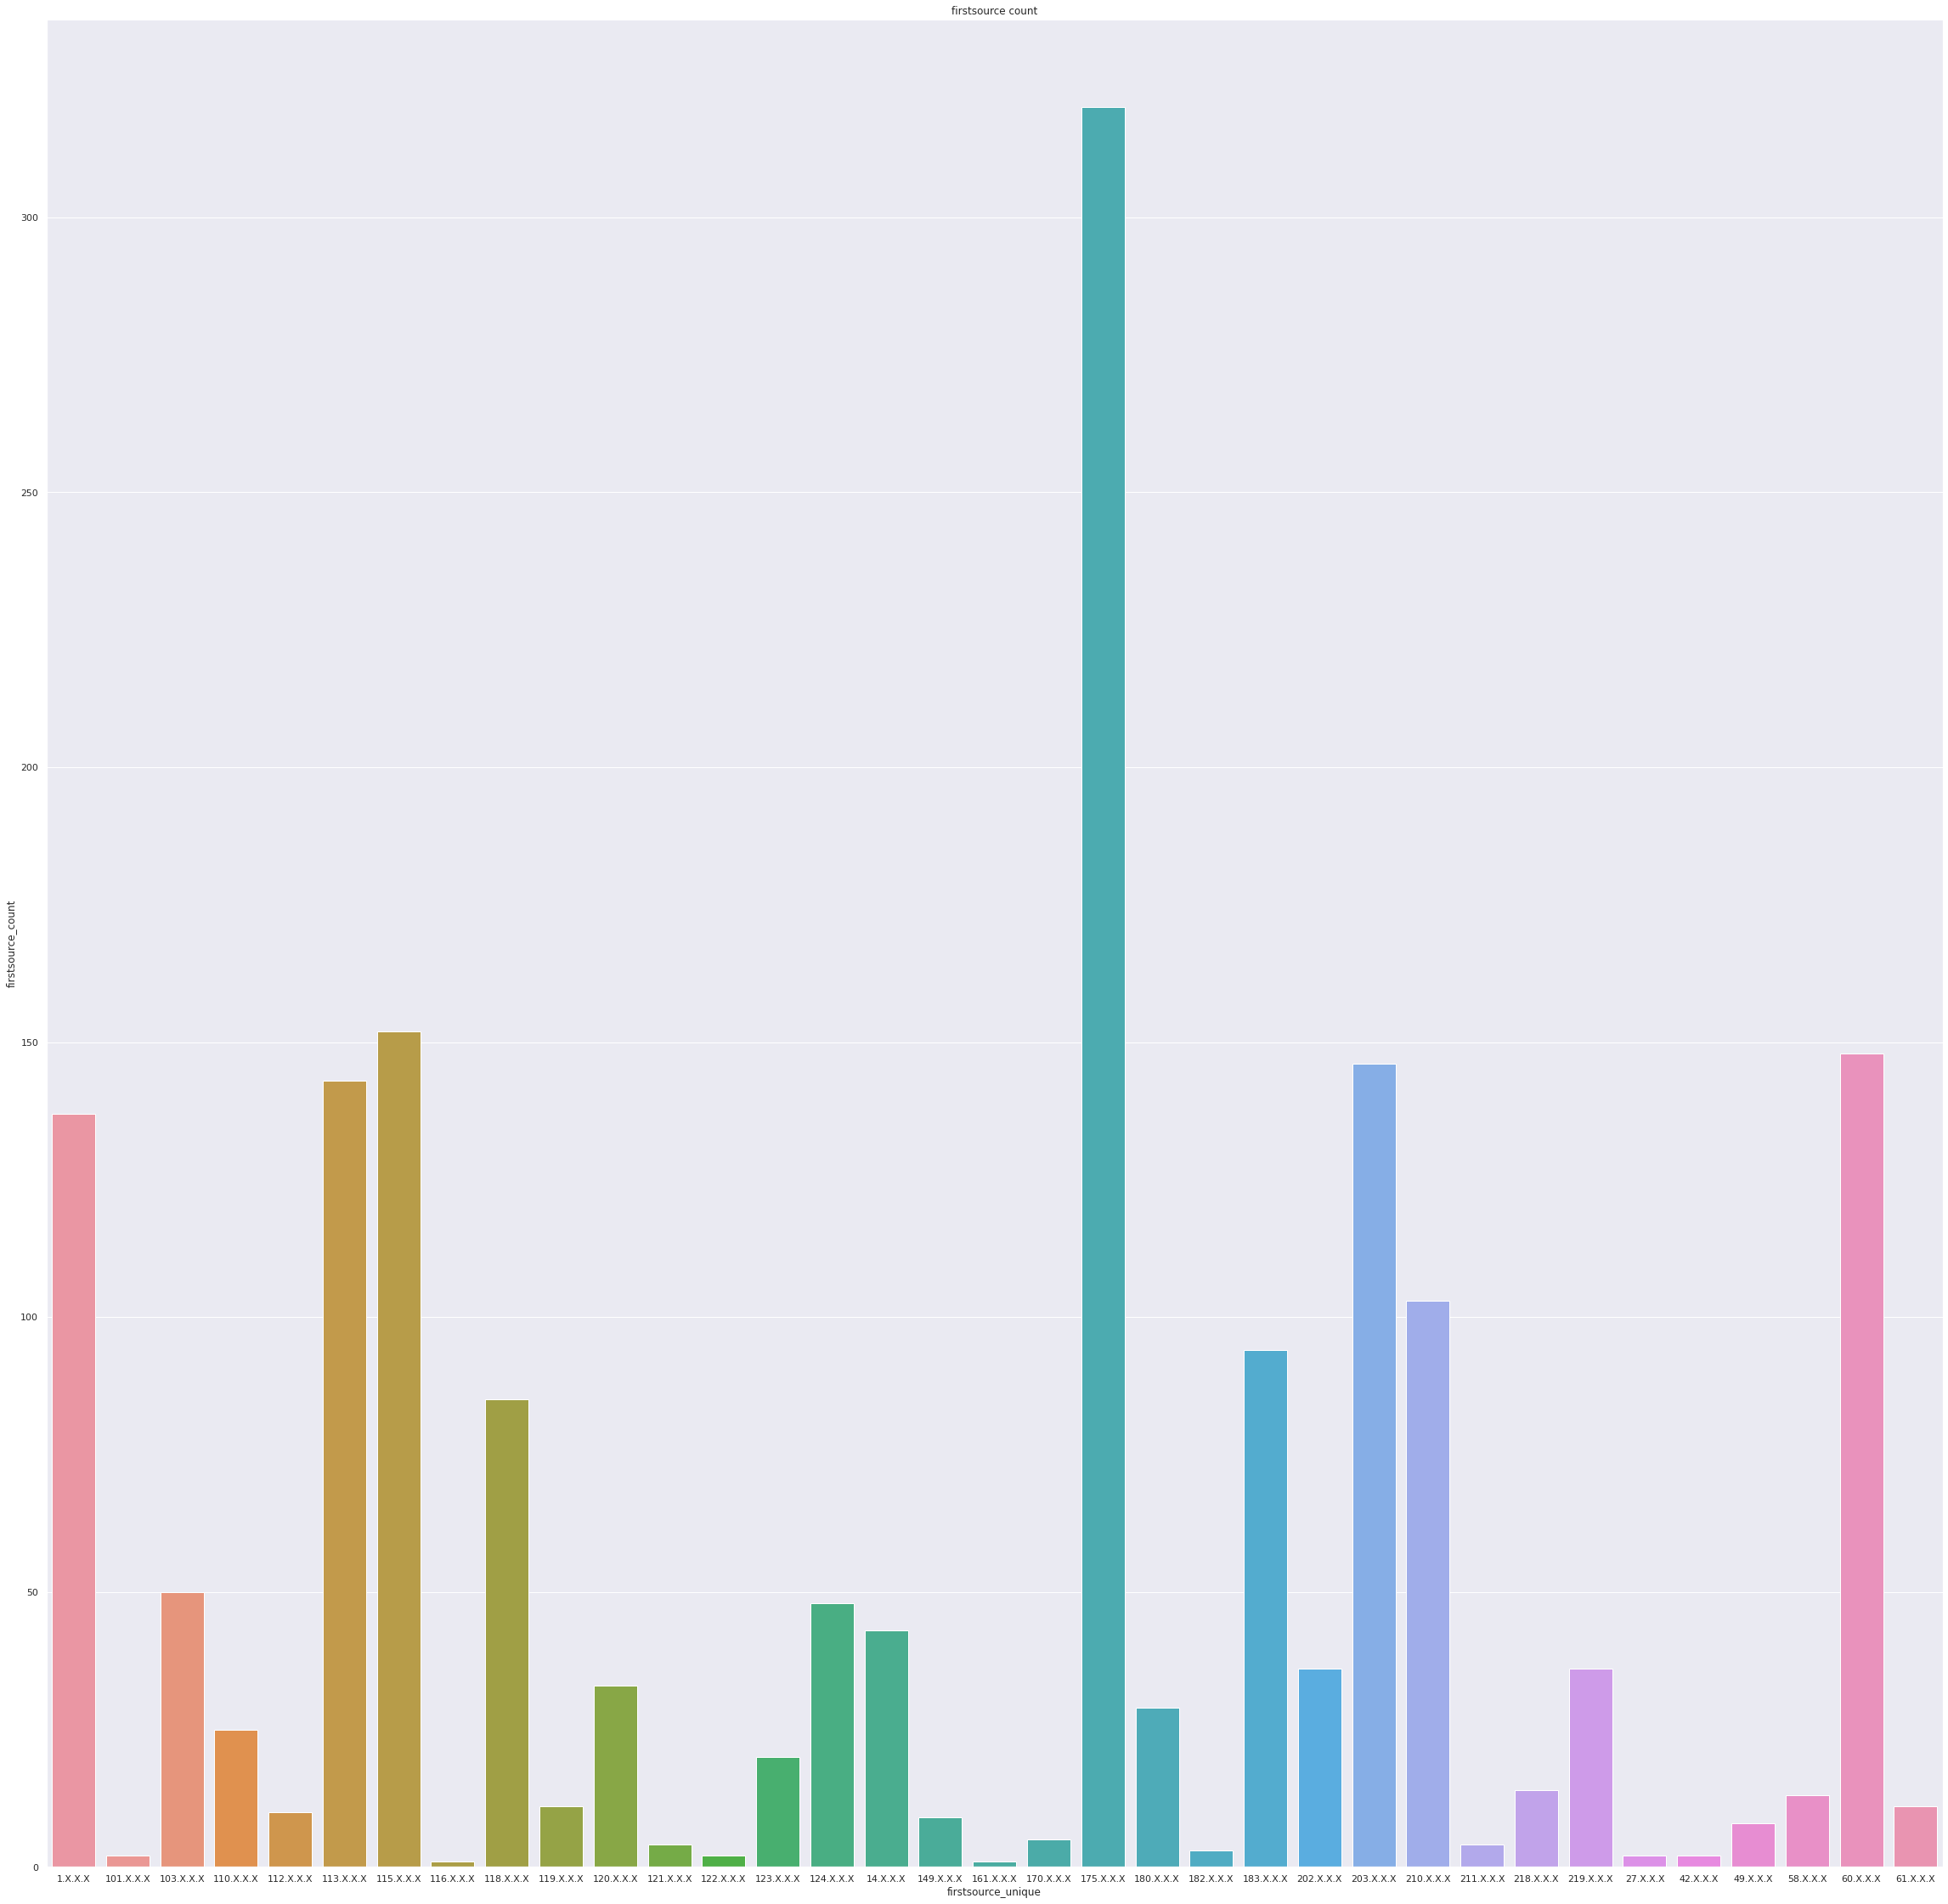

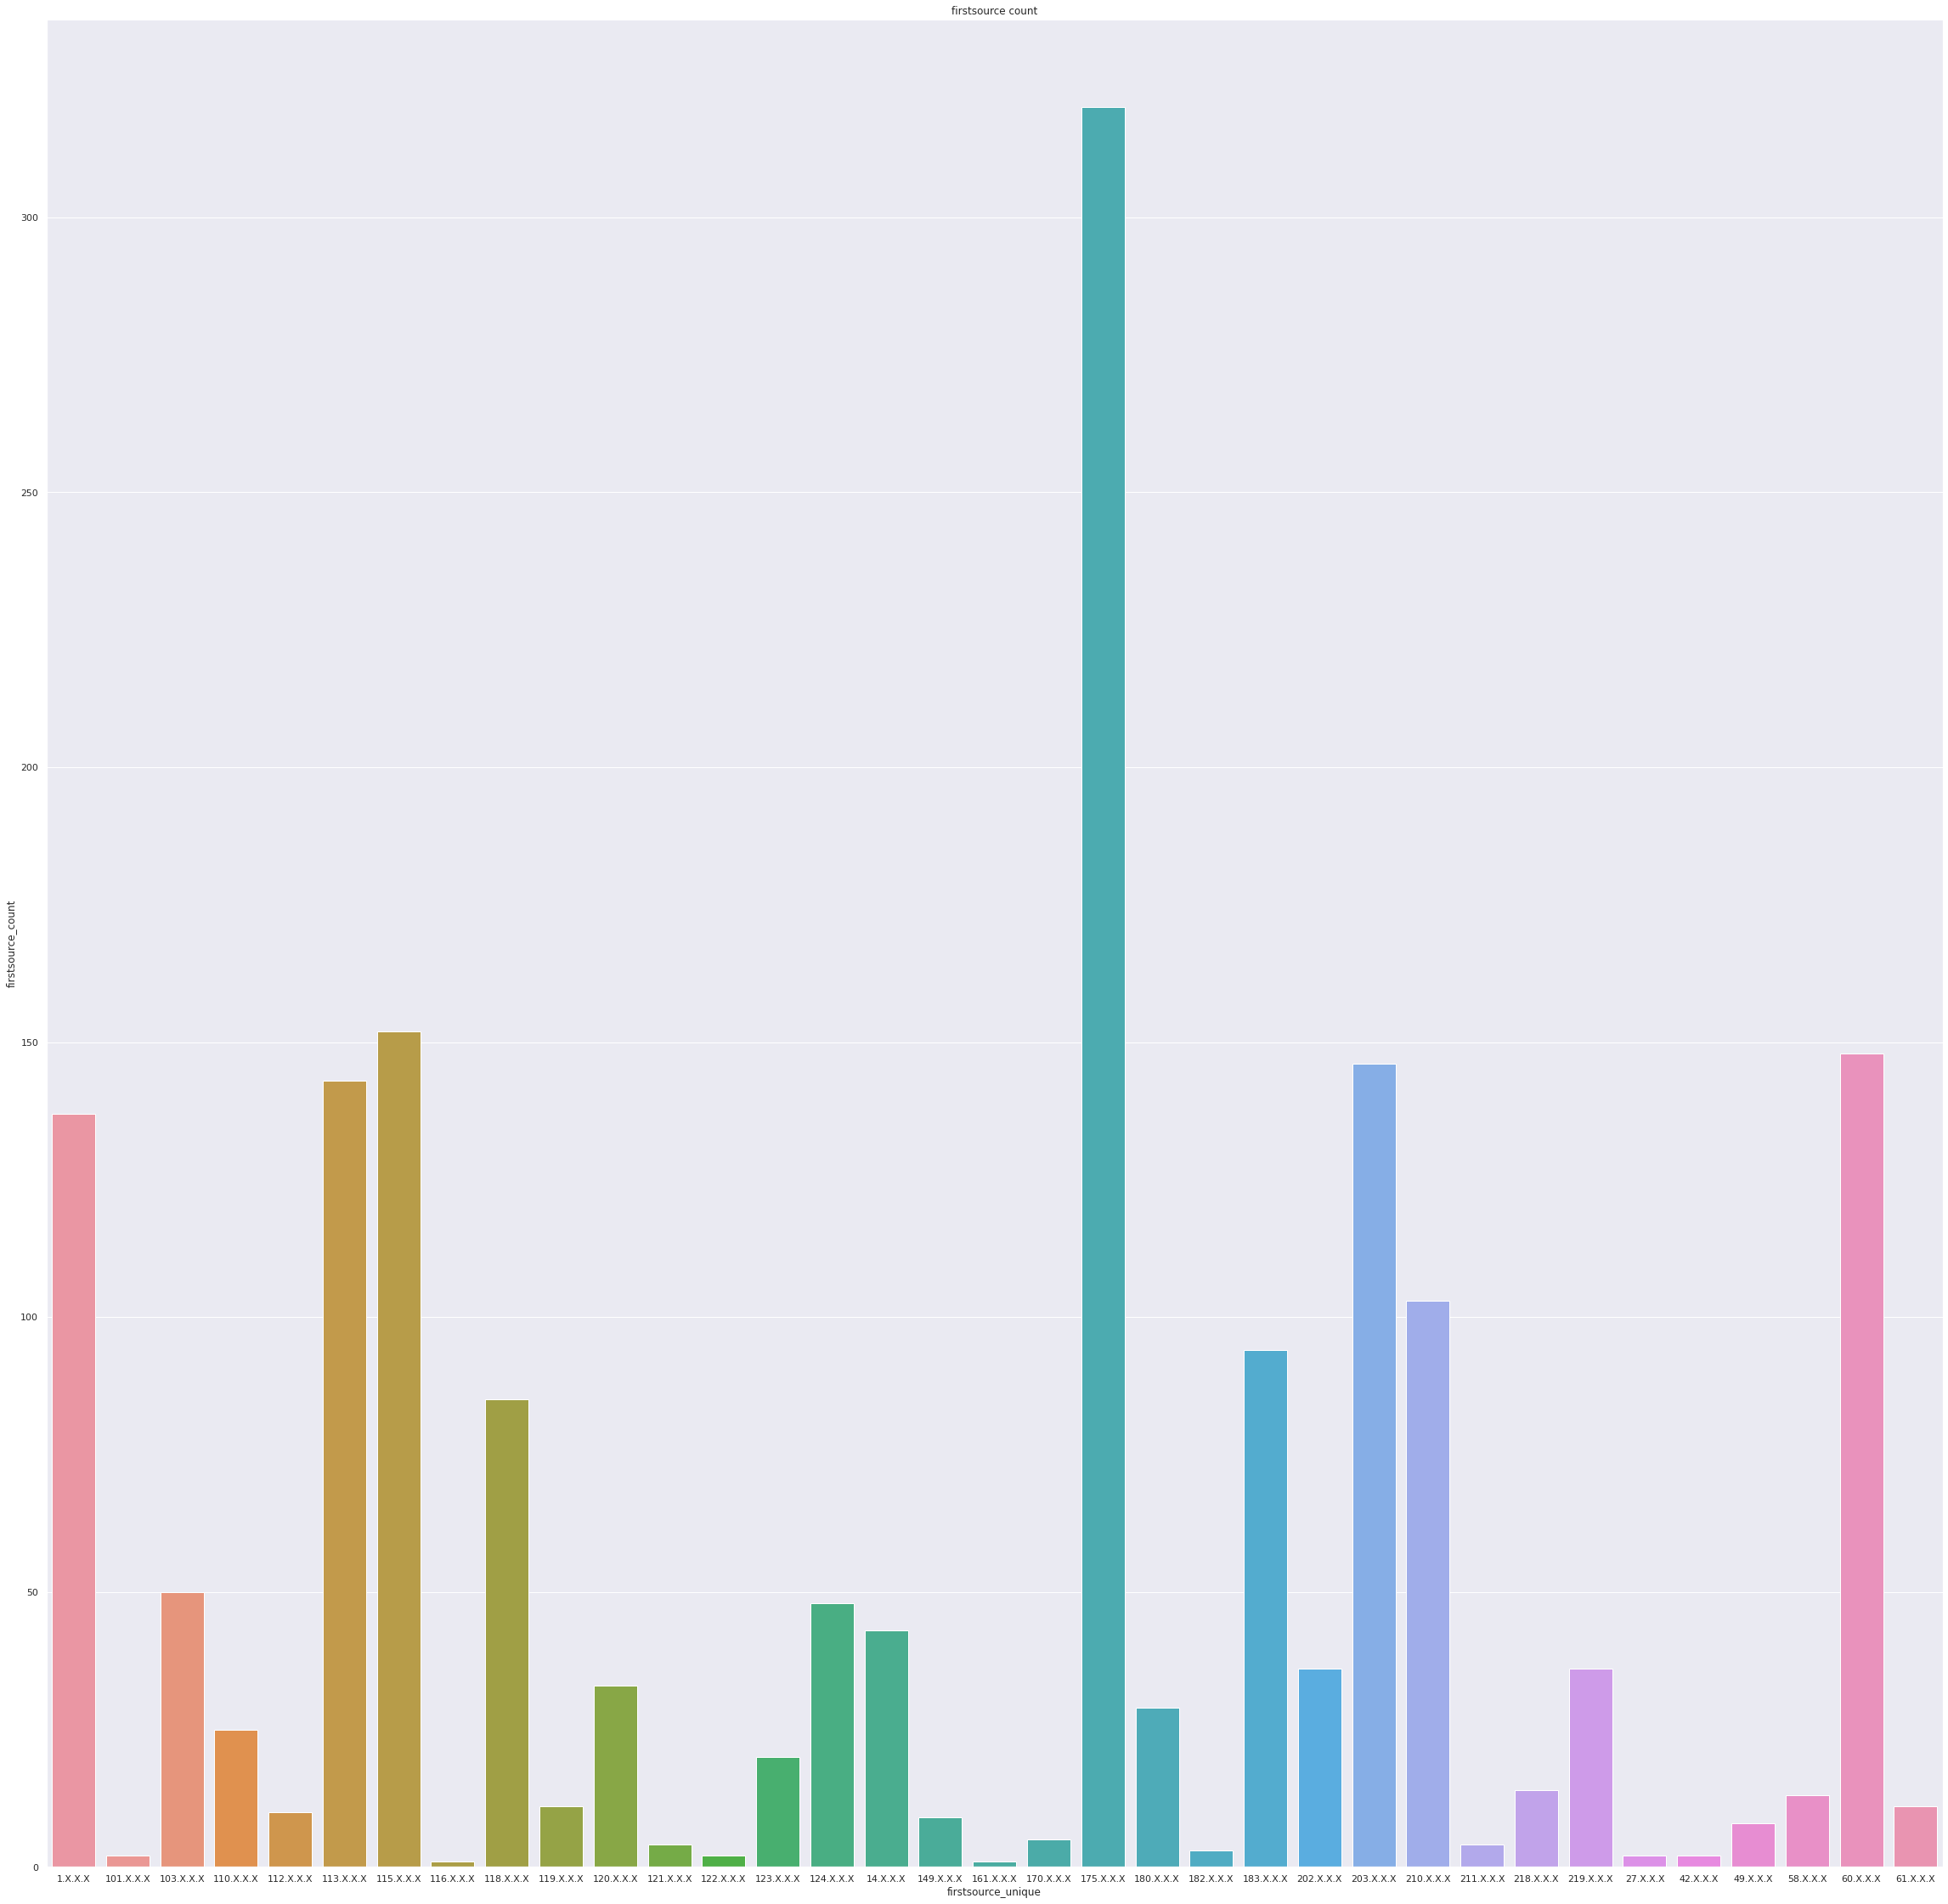

In [ ]:
threat = ds['Threat Confidence'].unique().tolist()
for i in threat:
    FirstSource_unique, FirstSource_count = np.unique(ds[ds['Threat Confidence']==i]['FirstSource'], return_counts = True)
    fig = plt.figure(figsize =(40,40))
    sns.barplot(firstsource_unique,firstsource_count)
    plt.xlabel('firstsource_unique')
    plt.ylabel('firstsource_count')
    plt.title('firstsource count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



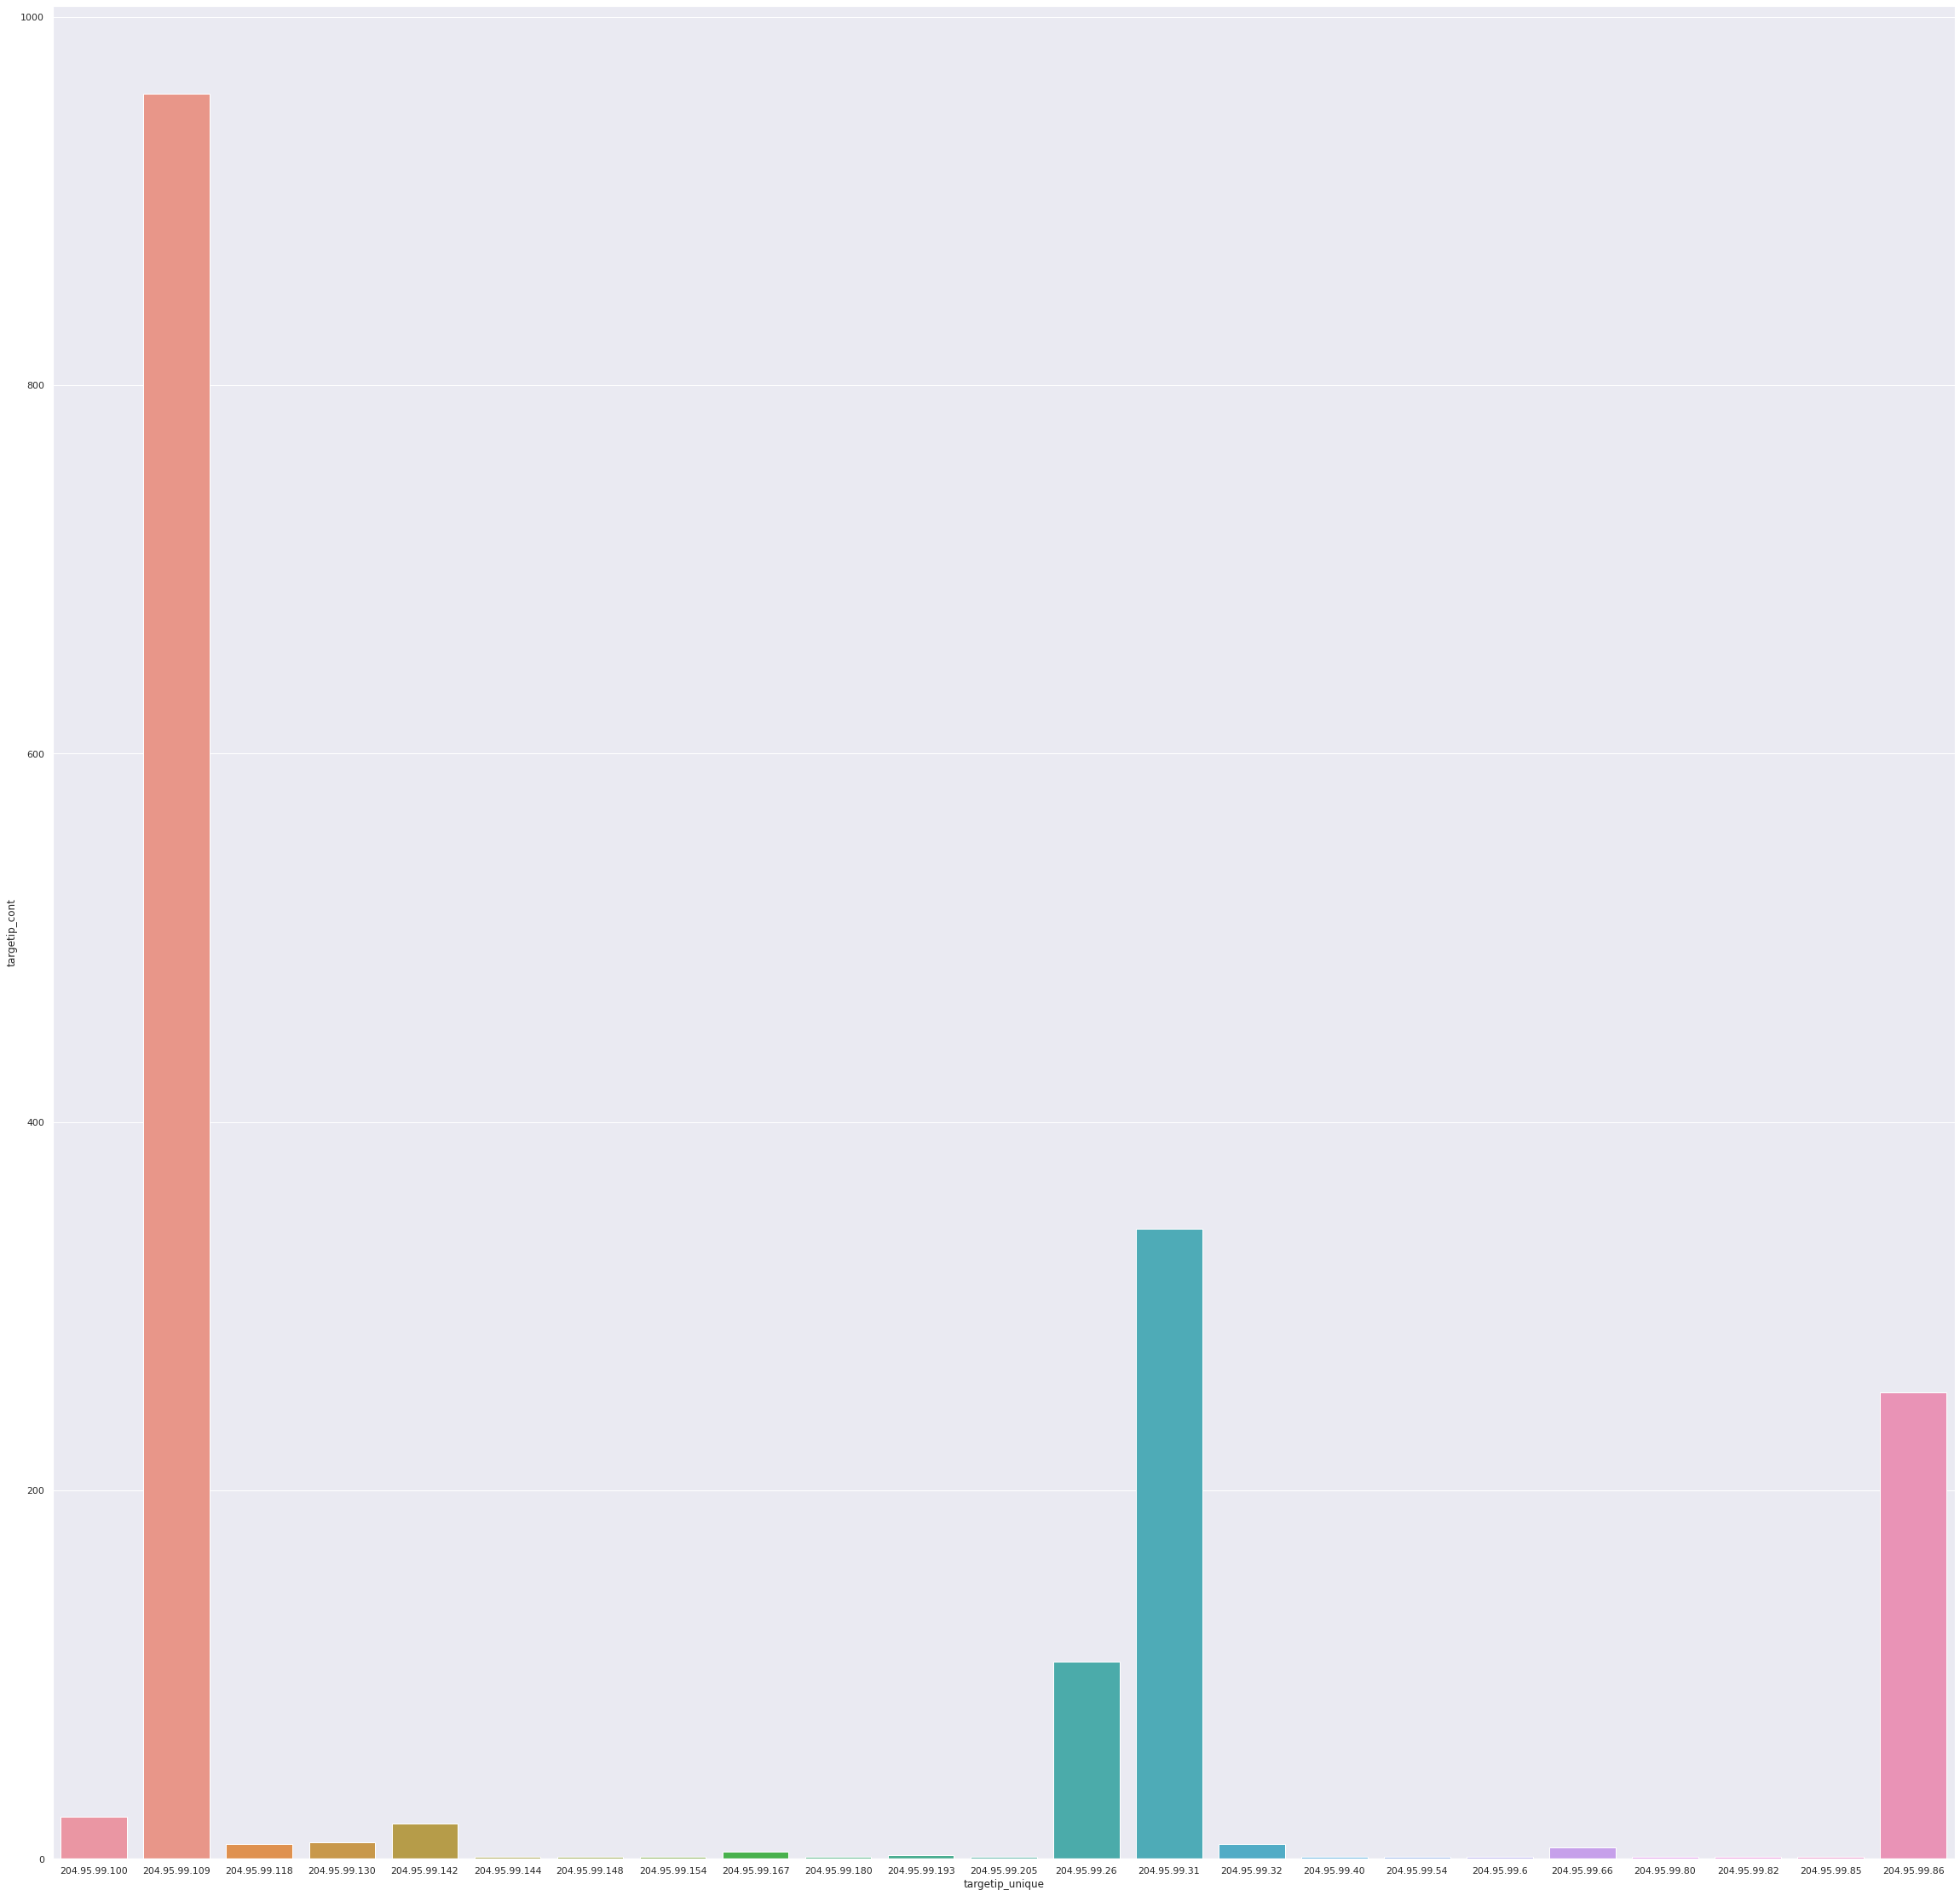

In [ ]:
targetip_unique, targetip_count = np.unique(ds['TargetIp'], return_counts = True)
fig = plt.figure(figsize=(40,40))
sns.barplot(targetip_unique,targetip_count)
plt.xlabel('targetip_unique')
plt.ylabel("targetip_cont")
plt.title=('targetship')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



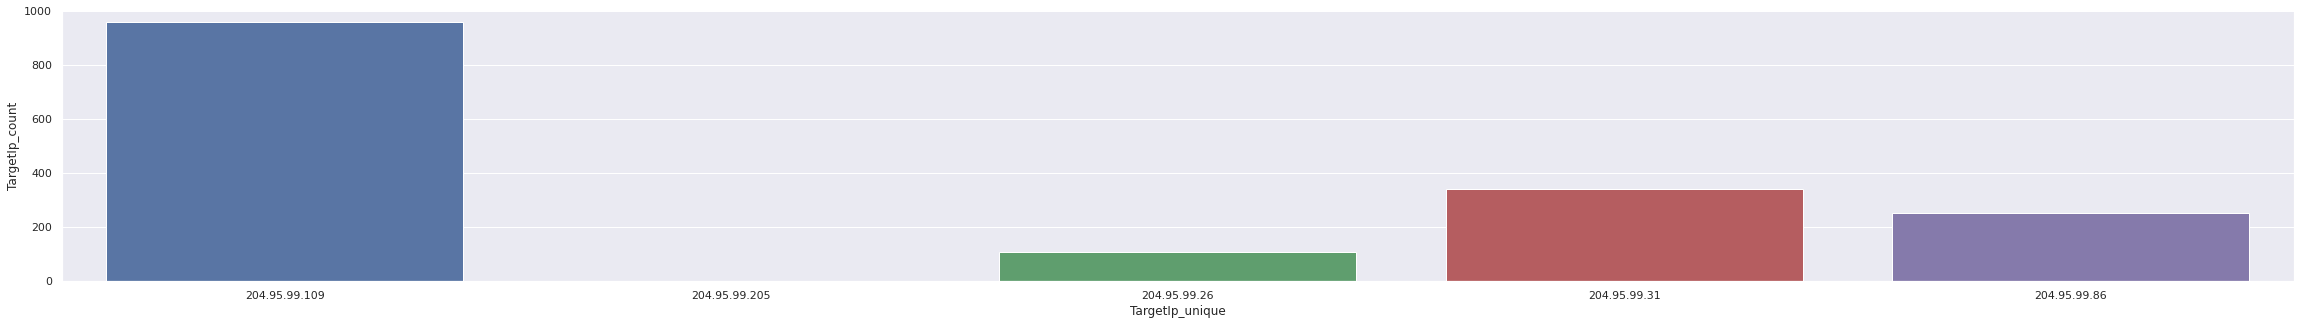

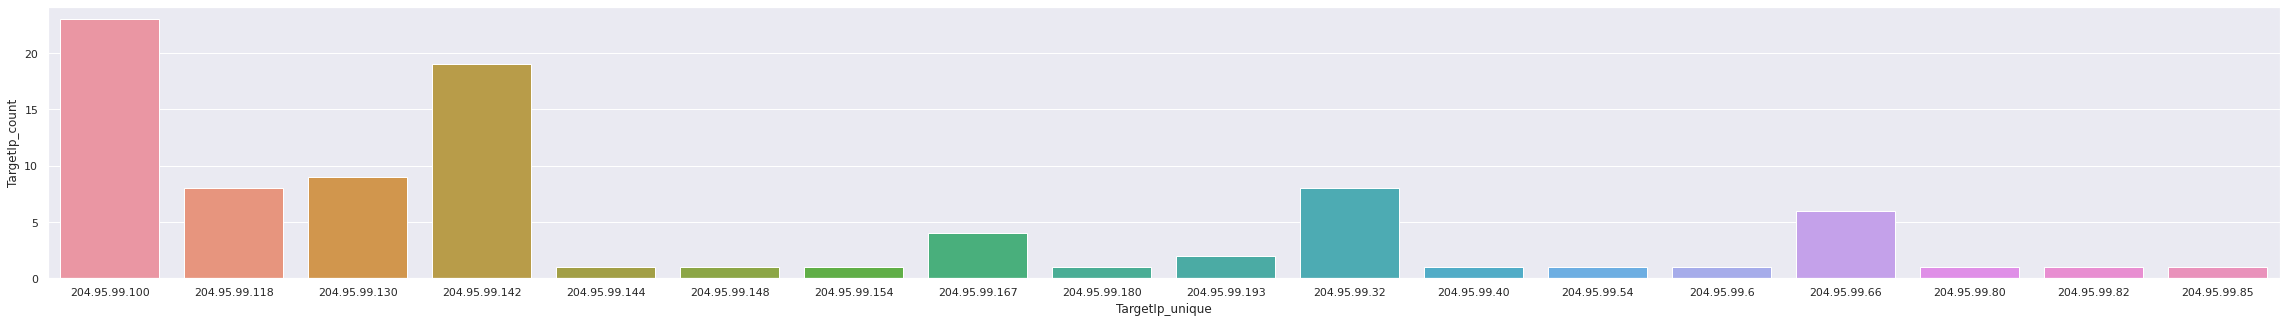

In [ ]:
threat = ds['Threat Confidence'].unique().tolist()
for i in threat:
    TargetIp_unique, TargetIp_count = np.unique(ds[ds['Threat Confidence']==i]['TargetIp'], return_counts = True)
    fig = plt.figure(figsize=(40,5))
    sns.barplot(TargetIp_unique,TargetIp_count)
    plt.xlabel('TargetIp_unique')
    plt.ylabel('TargetIp_count')
    plt.title=('TargetIp count')
plt.show()    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



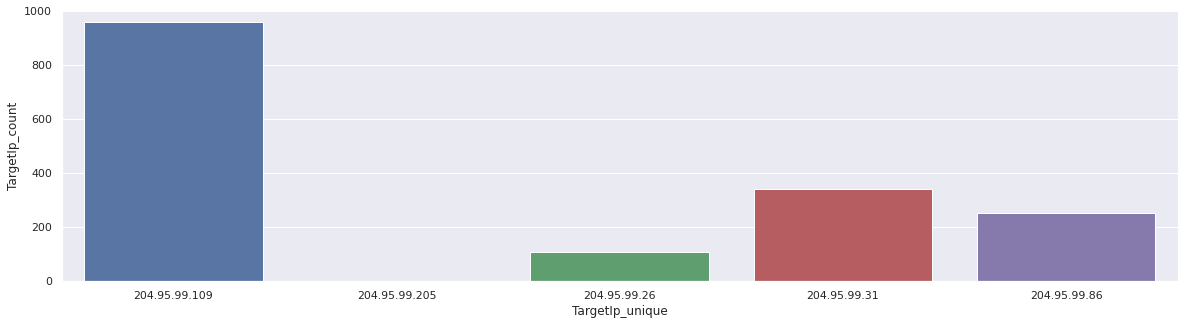

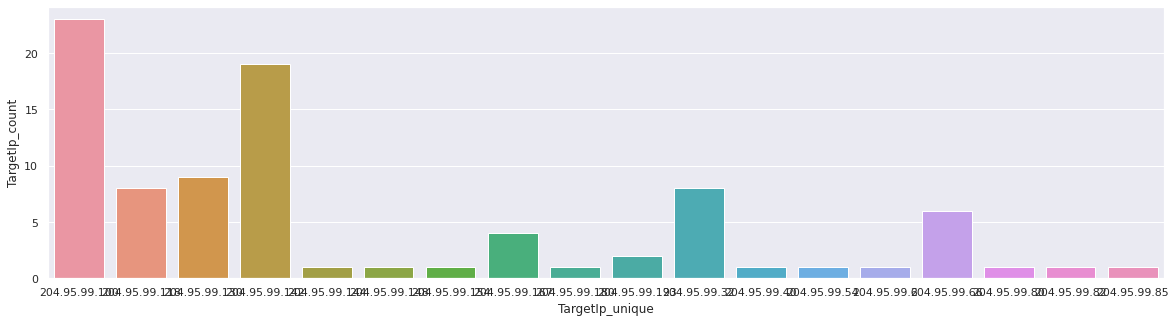

In [ ]:
threat = ds['Threat Confidence'].unique().tolist()
for i in threat:
    TargetIp_unique, TargetIp_count = np.unique(ds[ds['Threat Confidence']==i]['TargetIp'], return_counts = True)
    fig = plt.figure(figsize=(20,5))
    sns.barplot(TargetIp_unique,TargetIp_count)
    plt.xlabel('TargetIp_unique')
    plt.ylabel('TargetIp_count')
    plt.title=('Target count')
plt.show()    


In [ ]:
from sklearn.preprocessing import LabelEncoder

ds['threat_int']=LabelEncoder().fit_transform(ds['Threat Confidence'])

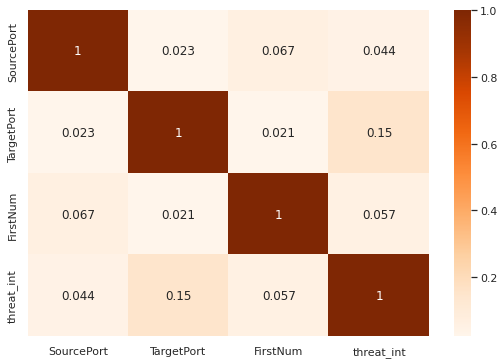

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(ds[['SourcePort','TargetPort','FirstNum','threat_int']].corr(), annot=True,cmap='Oranges')
plt.show()

Doesnt really show strong correlation between attributes

<Figure size 1440x1080 with 0 Axes>

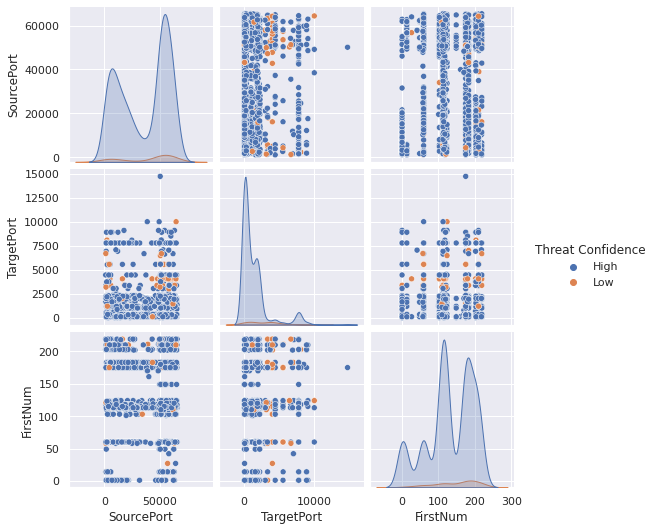

In [ ]:
plt.figure(figsize=(20, 15))
sns.pairplot(ds[['SourcePort','TargetPort','FirstNum','Threat Confidence']], hue="Threat Confidence")
plt.show()

### Making X, Y

In [ ]:
X = ds[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetPort','TargetIp','SourceIpAsnNr','SourcePort']]
X.head()

,Botnet,FirstSource,PostLegit,SourceIpCity,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,B106-CB,175.X.X.X,LEGIT,Kuala Lumpur,1921,204.95.99.31,AS4788,49927
1,B106-Jenxcus,60.X.X.X,LEGIT,Balingian,991,204.95.99.86,AS4788,24026
2,B106-MULTI,202.X.X.X,LEGIT,Kuala Lumpur,7777,204.95.99.109,AS18206,58104
3,B106-MULTI,120.X.X.X,LEGIT,Batu Caves,88,204.95.99.109,AS38322,53052
4,B106-Bladabindi,210.X.X.X,LEGIT,Petaling Jaya,1333,204.95.99.26,AS4788,61840


In [ ]:
X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']]=X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X.head()

,Botnet,FirstSource,PostLegit,SourceIpCity,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,2,19,0,52,1921,13,29,49927
1,10,33,0,9,991,22,29,24026
2,11,23,0,52,7777,1,8,58104
3,11,10,0,13,88,1,22,53052
4,1,25,0,75,1333,12,29,61840


In [ ]:
Y = ds['threat_int']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: threat_int, dtype: int64

#**Balancing data**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
Y.value_counts()

0    1661
1      89
Name: threat_int, dtype: int64

In [ ]:
oversample = SMOTE(sampling_strategy={0:2000,1:500})
X, Y = oversample.fit_resample(X, Y)
undersample = RandomUnderSampler(sampling_strategy={0:300,1:100})
X, Y = undersample.fit_resample(X, Y)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning:

After over-sampling, the number of samples (2000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1661)



In [ ]:
X,Y

(     Botnet  FirstSource  PostLegit  SourceIpCity  TargetPort  TargetIp  \
 0        10           25          0            56         991        22   
 1         9           20          0             0          85         3   
 2         1           19          1            52       14725        12   
 3        10           22          0            52        4442        22   
 4        10           19          0            72        1604        22   
 ..      ...          ...        ...           ...         ...       ...   
 395       9           27          0            70         708        12   
 396      14           23          0            87        1647         3   
 397      12           25          0            58        4040         0   
 398       6           19          1            16        5552        18   
 399      15           19          0            63          86         4   
 
      SourceIpAsnNr  SourcePort  
 0               29        5780  
 1               2

#**Splitting of data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
Y_test.value_counts()

0    65
1    15
Name: threat_int, dtype: int64

#**Model Training**

In [ ]:
from sklearn.ensemble import *
from sklearn import metrics

gb = GradientBoostingClassifier().fit(X_train, Y_train)
ada = AdaBoostClassifier().fit(X_train, Y_train)
bagging = BaggingClassifier().fit(X_train, Y_train)
rf = RandomForestClassifier().fit(X_train, Y_train)

## Gradient boosting validation

In [ ]:
print("Gradient boosting validation")
print(metrics.classification_report(Y_test, gb.predict(X_test), target_names = ds['Threat Confidence'].unique()))

Gradient boosting validation
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        65
         Low       1.00      1.00      1.00        15

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Adaboost validation

In [ ]:
print("AdaBoost validation")
print(metrics.classification_report(Y_test, ada.predict(X_test), target_names = ds['Threat Confidence'].unique()))

AdaBoost validation
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        65
         Low       1.00      1.00      1.00        15

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## random forest validation

In [ ]:
print("RandomForest validation")
print(metrics.classification_report(Y_test, rf.predict(X_test), target_names = ds['Threat Confidence'].unique()))

RandomForest validation
              precision    recall  f1-score   support

        High       1.00      0.98      0.99        65
         Low       0.94      1.00      0.97        15

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



## Bagging validation

In [ ]:
print("Bagging validation Result")
print(metrics.classification_report(Y_test, bagging.predict(X_test), target_names = ds['Threat Confidence'].unique()))

Bagging validation Result
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        65
         Low       1.00      1.00      1.00        15

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Ensemble Learning

In [ ]:
pred = ada.predict_proba(X_test)*0.1 + gb.predict_proba(X_test)*0.6 + rf.predict_proba(X_test)*0.3
pred = [np.argmax(x) for x in pred]


## Ensemble validation

In [ ]:
print("Ensemble Classifier with ( RF*0.3 + AdaBoost*0.1 + GBM*0.6 ) weightage")

print(metrics.classification_report(Y_test, pred, target_names = ds['Threat Confidence'].unique()))

Ensemble Classifier with ( RF*0.3 + AdaBoost*0.1 + GBM*0.6 ) weightage
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        65
         Low       1.00      1.00      1.00        15

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Gradient boosting feature importances


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



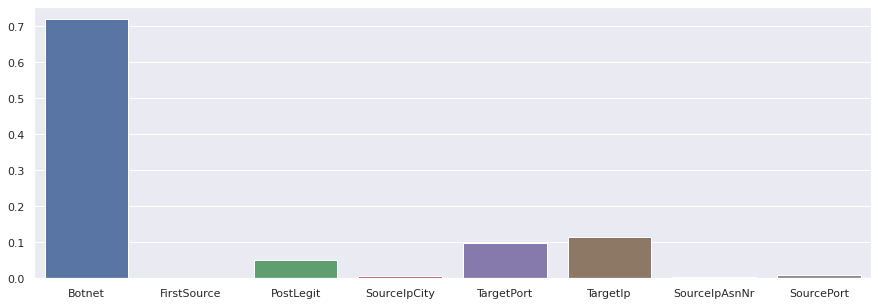

In [ ]:
print('Gradient boosting feature importances')
plt.figure(figsize=(15, 5))
sns.barplot(np.arange(X.shape[1]),gb.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.show()

Adaboost feature importances


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



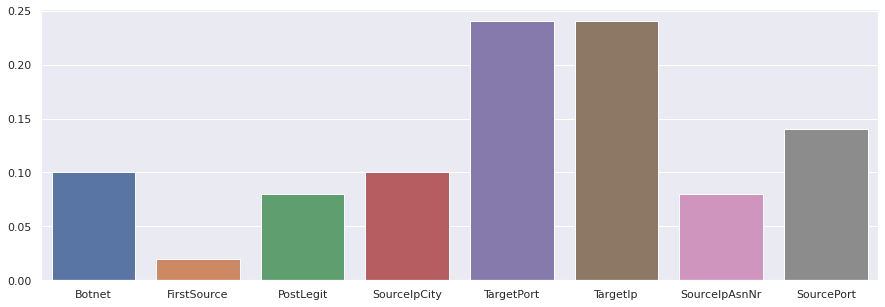

In [ ]:
print('Adaboost feature importances')
plt.figure(figsize=(15, 5))
sns.barplot(np.arange(X.shape[1]),ada.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.show()

Random Forest feature importances


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



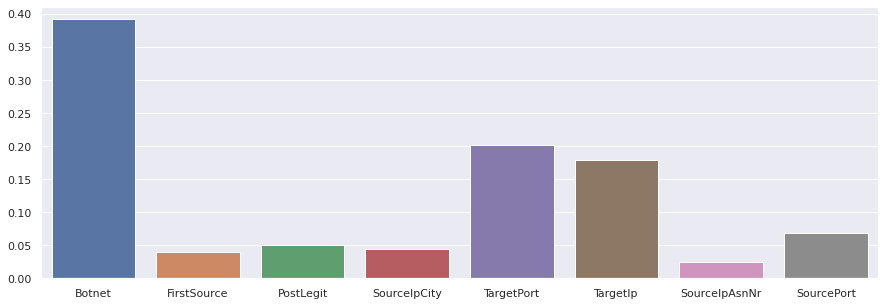

In [ ]:
print('Random Forest feature importances')
plt.figure(figsize=(15, 5))
sns.barplot(np.arange(X.shape[1]),rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.show()